In [1]:
%matplotlib inline
import pymc3 as pm
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
plt.style.use(['seaborn-darkgrid', 'seaborn-colorblind'])

#### Code 9.1

In [2]:
d = {'A':[0, 0, 10, 0, 0], 'B':[0, 1, 8, 1, 0], 'C':[0, 2, 6, 2, 0], 'D':[1, 2, 4, 2, 1], 'E':[2, 2, 2, 2, 2]}
p = pd.DataFrame(data=d)

#### Code 9.2

In [3]:
p_norm = p/p.sum(0)

#### Code 9.3

In [4]:
def entropy(x):
    y = []
    for i in x:
        if i == 0:
            y.append(0)
        else: 
            y.append(i*np.log(i))
    h = -sum(y)
    return h
H = p_norm.apply(entropy, axis=0)
print(H)

A   -0.000000
B    0.639032
C    0.950271
D    1.470808
E    1.609438
dtype: float64


#### Code 9.4

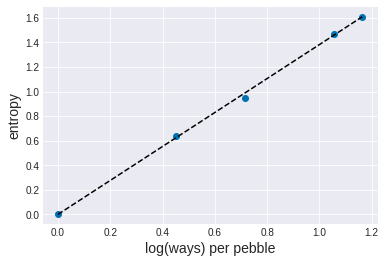

In [5]:
ways = [1, 90, 1260, 37800, 113400]
logwayspp = np.log(ways)/10
plt.plot(logwayspp, H, 'o')
plt.plot([0.0, max(logwayspp)], [0.0, max(H)],'--k')
plt.ylabel('entropy', fontsize=14);
plt.xlabel('log(ways) per pebble', fontsize=14)
plt.show()

#### Code 9.5

In [6]:
# Build list of the candidate distributions.
p = [[1/4, 1/4, 1/4, 1/4], [2/6, 1/6, 1/6, 2/6], [1/6, 2/6, 2/6, 1/6], [1/8, 4/8, 2/8, 1/8]]

# Compute expected value of each. The sum of the multiplied entries is just a dot product.
p_ev = [np.dot(i,[0, 1, 1, 2]) for i in p]
print(p_ev)

[1.0, 1.0, 1.0, 1.0]


#### Code 9.6

In [7]:
# Compute entropy of each distribution
p_ent = [entropy(i) for i in p]
print(p_ent)

[1.3862943611198906, 1.3296613488547582, 1.3296613488547582, 1.2130075659799042]


#### Code 9.7

In [8]:
p = 0.7
A = [(1-p)**2, p*(1-p), (1-p)*p, p**2]
print(A)

[0.09000000000000002, 0.21000000000000002, 0.21000000000000002, 0.48999999999999994]


#### Code 9.8

In [9]:
-np.sum(A*np.log(A))

1.221728604109787

#### Code 9.9

In [10]:
def sim_p(G=1.4):
    x123 = np.random.uniform(size=3)
    x4 = (G * np.sum(x123) - x123[1] - x123[2]) / (2 - G)
    x1234 = np.concatenate((x123, [x4]))
    z = np.sum(x1234)
    p = x1234 / z
    return - np.sum(p * np.log(p)), p

#### Code 9.10

In [11]:
H = []
p = np.zeros((10**5, 4))
for rep in range(10**5):
    h, p_ = sim_p()
    H.append(h)
    p[rep] = p_

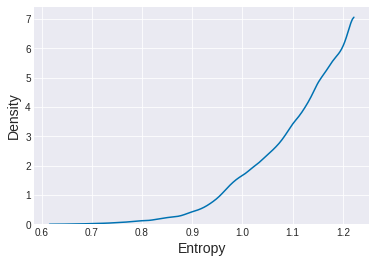

In [12]:
pm.kdeplot(H)
plt.xlabel('Entropy', fontsize=14)
plt.ylabel('Density', fontsize=14);

#### Code 9.12

In [13]:
np.max(H)

1.2217274607942563

#### Code 9.13

In [14]:
p[np.argmax(H)]

array([ 0.09029136,  0.20990356,  0.20951372,  0.49029136])

In [15]:
import sys, IPython, scipy, matplotlib, platform
print("This notebook was createad on a computer %s running %s and using:\nPython %s\nIPython %s\nPyMC3 %s\nNumPy %s\nPandas %s\nSciPy %s\nMatplotlib %s\n" % (platform.machine(), ' '.join(platform.linux_distribution()[:2]), sys.version[:5], IPython.__version__, pm.__version__, np.__version__, pd.__version__, scipy.__version__, matplotlib.__version__))

This notebook was createad on a computer x86_64 running debian stretch/sid and using:
Python 3.5.4
IPython 4.1.2
PyMC3 3.2
NumPy 1.13.3
Pandas 0.20.3
SciPy 0.19.1
Matplotlib 2.0.2

